In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import json
import re

In [5]:
df = pd.read_csv('data/Distribution of standardised income, 2022.csv')

df.head()

,standardised income (x 1000 euros),Households total,Single persion,Single person under AOW pension age,Single person above AOW entitlement age,Couple without children,Couple under AOW pension age without children,Couple above AOW entitlement age without children,Couple with children,Single-parent family,...,Three earners,Four or more earners,Wages,Profits,Pensions,Benefits,Private home owner,Tenant,Tenant without rent benefit,Tenant with rent benefit
0,less than -6,4,2,1,1,1,1,0,1,0,...,0,0,1,2,1,0,3,1,1,0
1,between -6 and -4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,between -4 and -2,2,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0
3,between -2 and 0,21,19,19,0,2,2,0,0,0,...,0,0,7,2,0,12,1,21,20,1
4,between 0 and 2,38,33,32,1,3,3,0,1,1,...,0,0,23,4,2,10,2,36,30,6


In [6]:
df['Total'] = df.iloc[:,1:].sum(axis=1)
total_population = df['Total'].sum()
df['Percentage'] = df['Total']/total_population*100

df.head()

,standardised income (x 1000 euros),Households total,Single persion,Single person under AOW pension age,Single person above AOW entitlement age,Couple without children,Couple under AOW pension age without children,Couple above AOW entitlement age without children,Couple with children,Single-parent family,...,Wages,Profits,Pensions,Benefits,Private home owner,Tenant,Tenant without rent benefit,Tenant with rent benefit,Total,Percentage
0,less than -6,4,2,1,1,1,1,0,1,0,...,1,2,1,0,3,1,1,0,27,0.047440
1,between -6 and -4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.005271
2,between -4 and -2,2,1,1,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,9,0.015813
3,between -2 and 0,21,19,19,0,2,2,0,0,0,...,7,2,0,12,1,21,20,1,169,0.296939
4,between 0 and 2,38,33,32,1,3,3,0,1,1,...,23,4,2,10,2,36,30,6,302,0.530625


In [7]:
df['Cumulative Percentage'] = df['Percentage'].cumsum()
print(df[['standardised income (x 1000 euros)', 'Total', 'Percentage', 'Cumulative Percentage']])

   standardised income (x 1000 euros)  Total  Percentage  \
0                        less than -6     27    0.047440   
1                   between -6 and -4      3    0.005271   
2                   between -4 and -2      9    0.015813   
3                    between -2 and 0    169    0.296939   
4                     between 0 and 2    302    0.530625   
5                     between 2 and 4    359    0.630776   
6                     between 4 and 6    407    0.715114   
7                     between 6 and 8    401    0.704572   
8                    between 8 and 10    441    0.774853   
9                   between 10 and 12    472    0.829321   
10                  between 12 and 14    643    1.129775   
11                  between 14 and 16   1187    2.085603   
12                  between 16 and 18   2492    4.378536   
13                  between 18 and 20   3400    5.973926   
14                  between 20 and 22   3663    6.436026   
15                  between 22 and 24   

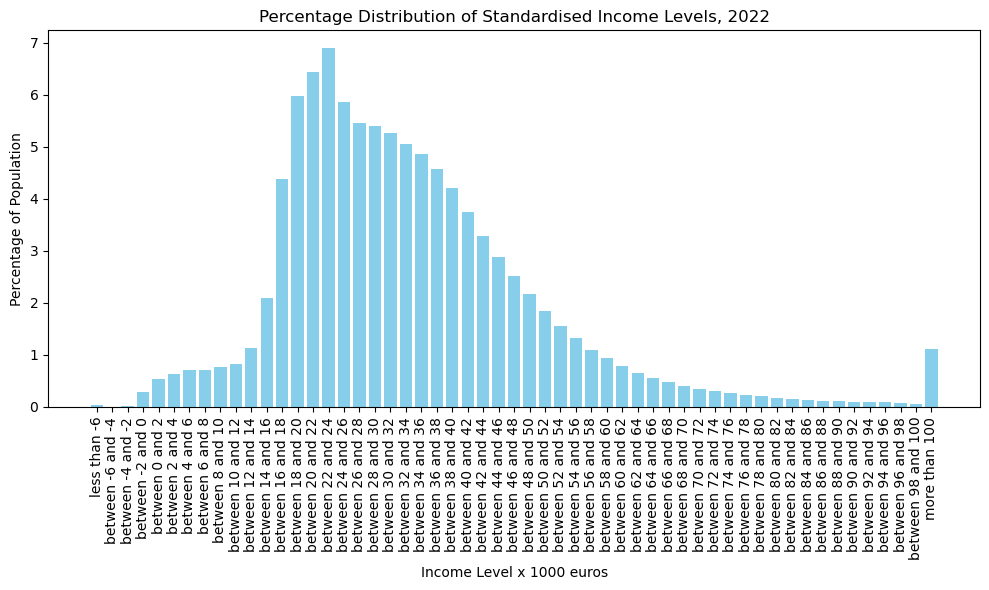

In [7]:
plt.figure(figsize=(10,6))
plt.bar(df.iloc[:, 0], df['Percentage'], color='skyblue')
plt.title('Percentage Distribution of Standardised Income Levels, 2022')
plt.xlabel('Income Level x 1000 euros')
plt.ylabel('Percentage of Population')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [26]:
# Create JSON File
x_values = df.iloc[:, 0].tolist()
percentages = df['Percentage']

# Normalize percentages to sum to 1
normalized_percentages = (percentages / percentages.sum()).tolist()

# Helper function to find the middle value of each range
def middle_value(range_str):
    if 'less than' in range_str:
        return -6  
    elif 'more than' in range_str:
        return 100 
    else:
        match = re.match(r'between (-?\d+) and (-?\d+)', range_str)
        if match:
            start, end = map(int, match.groups())
            return (start + end) // 2
        else:
            return None

# Convert x_values to middle values
middle_values = [middle_value(x) for x in x_values]

# Save middle_values and normalized_percentages to a JSON file
distribution_data = {
    'x_values': x_values,
    'middle_values': middle_values,
    'normalized_percentages': normalized_percentages
}

with open('data/distribution_data.json', 'w') as file:
    json.dump(distribution_data, file)


Shape: 0.5692473281400429, Scale: 29.48480235857586


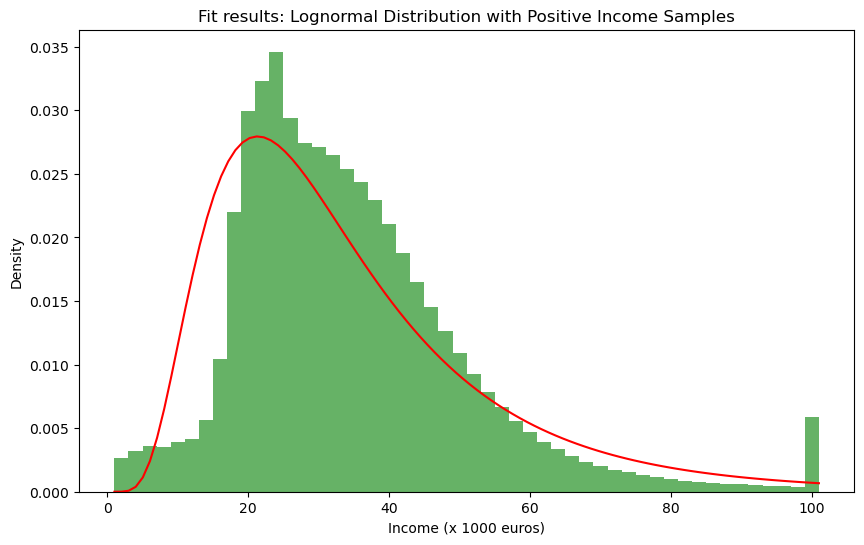

In [28]:


# Process income range data, calculate midpoints, and generate repeated samples
samples = []
for index, row in df.iterrows():
    income_range = row['standardised income (x 1000 euros)']
    percentage = row['Percentage']
    if 'between' in income_range:
        bounds = income_range.replace('between ', '').split(' and ')
        mid_point = (float(bounds[0]) + float(bounds[1])) / 2
    elif 'less than' in income_range:
        continue  # Skip ranges described as 'less than' some value
    elif 'more than' in income_range:
        bound = float(income_range.replace('more than ', ''))
        mid_point = bound + 1  # Assuming a default range for more than
    else:
        continue  # Skip if the format is not recognized
    if mid_point <= 0:
        continue  # Ignore income data that are less than or equal to zero
    # Repeat mid_point according to its proportion in the total population
    num_samples = int((percentage / 100) * total_population)
    samples.extend([mid_point] * num_samples)

# Convert the income data into a NumPy array
sample_data = np.array(samples)

# Fit a lognormal distribution to the data
shape, loc, scale = stats.lognorm.fit(sample_data, floc=0)  # Set location parameter to 0

# Print the fitted parameters
print(f"Shape σ: {shape}, Scale e^μ: {scale}")

# Plot the fitted curve
x = np.linspace(sample_data.min(), sample_data.max(), 100)
pdf_fitted = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)

plt.figure(figsize=(10, 6))
plt.hist(sample_data, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, pdf_fitted, 'r-')
plt.title('Fit results: Lognormal Distribution with Positive Income Samples')
plt.xlabel('Income (x 1000 euros)')
plt.ylabel('Density')
plt.show()


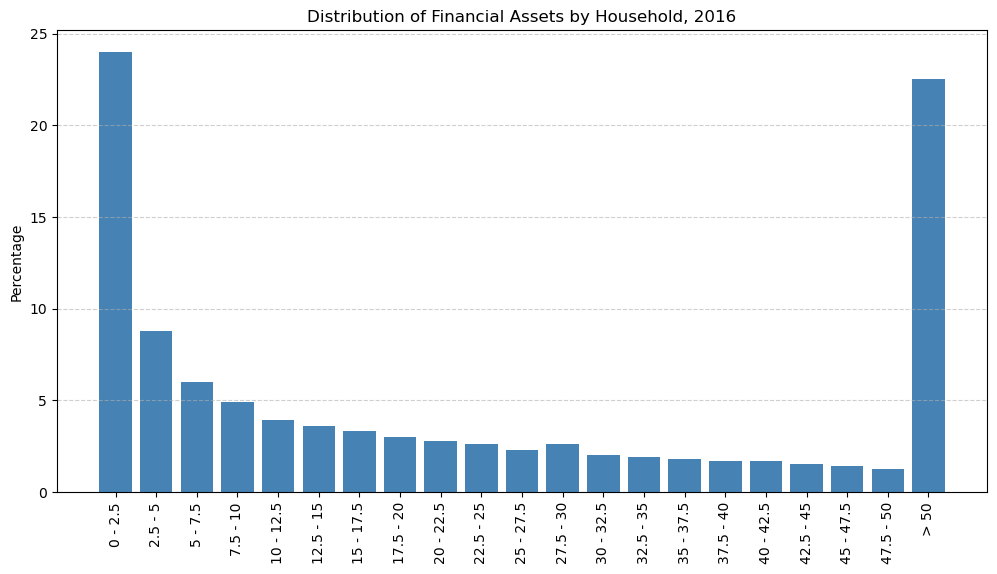

In [15]:
# Data extracted from the provided image
financial_assets = [
    "0 - 2.5", "2.5 - 5", "5 - 7.5", "7.5 - 10", "10 - 12.5", 
    "12.5 - 15", "15 - 17.5", "17.5 - 20", "20 - 22.5", "22.5 - 25", 
    "25 - 27.5", "27.5 - 30", "30 - 32.5", "32.5 - 35", "35 - 37.5", 
    "37.5 - 40", "40 - 42.5", "42.5 - 45", "45 - 47.5", "47.5 - 50", 
    "> 50"
]
percentages = [
    24.0, 8.8, 6.0, 4.9, 3.9, 3.6, 3.3, 3.0, 2.8, 2.6, 
    2.3, 2.6, 2.0, 1.9, 1.8, 1.7, 1.7, 1.5, 1.4, 1.25, 22.5
]

# Create the vertical bar chart
plt.figure(figsize=(12, 6))
plt.bar(financial_assets, percentages, color='steelblue')
plt.ylabel('Percentage')
plt.title('Distribution of Financial Assets by Household, 2016')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


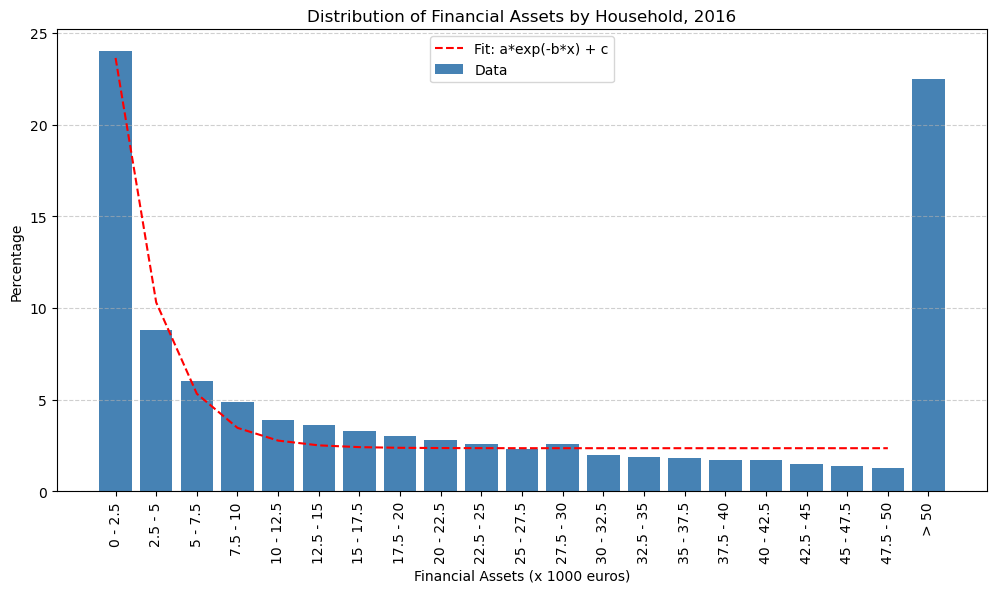

array([21.28705374,  0.98484644,  2.35362231])

In [20]:
# Adjusting the provided plotting code to include a curve fit, excluding the last data point for fitting

# Exclude the last point for fitting purposes
financial_assets_for_fit = financial_assets[:-1]
percentages_for_fit = percentages[:-1]

# Generate x data for fitting
x_data_for_fit = np.array(range(len(financial_assets_for_fit)))

# Fit the curve using the exponential decay model, excluding the last data point
params_for_fit, params_covariance_for_fit = curve_fit(exp_decay, x_data_for_fit, percentages_for_fit, p0=[24, 0.1, 1])

# Plot the results with all data, but fit only to the data excluding the last point
plt.figure(figsize=(12, 6))
plt.bar(financial_assets, percentages, color='steelblue', label='Data')
plt.plot(financial_assets_for_fit, exp_decay(x_data_for_fit, *params_for_fit), color='red', linestyle='--', label='Fit: a*exp(-b*x) + c')
plt.xlabel('Financial Assets (x 1000 euros)')
plt.ylabel('Percentage')
plt.title('Distribution of Financial Assets by Household, 2016')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

params_for_fit
